In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop('CustomerId', axis='columns', inplace=True)

In [ ]:
df.drop('Surname', axis='columns', inplace=True)

In [ ]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

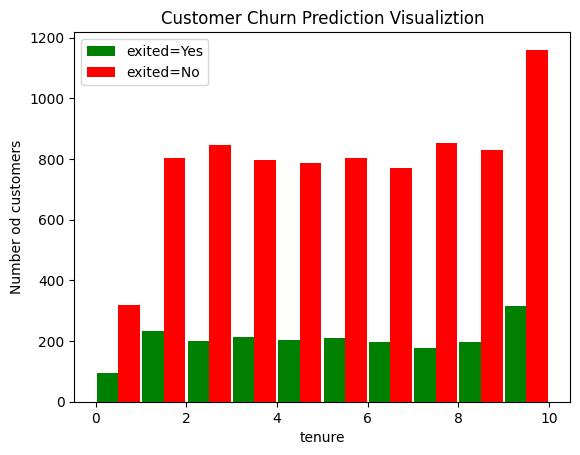

In [ ]:
tenure_exited_yes = df[df.Exited == 1].Tenure
tenure_exited_no = df[df.Exited == 0].Tenure

plt.xlabel("tenure")
plt.ylabel("Number od customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['exited=Yes','exited=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']


In [ ]:
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [ ]:
df.Gender.unique()

array([1, 0])

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df1.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536

In [ ]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
X_train.shape

(8000, 13)

In [ ]:
X_test.shape

(2000, 13)

In [ ]:
X_train[:10]

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,7752,0.800,1,0.283784,0.6,0.000000,2,0,0,0.096273,0,0,1
4154,4155,0.752,0,0.216216,0.3,0.000000,2,1,0,0.981478,1,0,0
3881,3882,0.476,1,0.621622,0.3,0.000000,1,1,1,0.948551,1,0,0
9238,9239,0.846,1,0.432432,0.4,0.000000,2,1,0,0.646869,1,0,0
5210,5211,0.402,0,0.229730,0.7,0.517012,2,0,0,0.434670,1,0,0
7487,7488,0.602,1,0.513514,0.4,0.000000,1,0,0,0.421898,1,0,0
7542,7543,0.314,1,0.216216,0.4,0.000000,2,1,1,0.303413,0,0,1
7524,7525,0.620,1,0.297297,0.8,0.666330,1,1,1,0.925815,1,0,0
9412,9413,0.750,0,0.108108,0.6,0.393324,1,0,0,0.668609,1,0,0
6377,6378,0.684,0,0.202703,0.9,0.000000,1,1,0,0.567526,1,0,0


In [ ]:
len(X_train.columns)

13

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 66.2604 - accuracy: 0.6561
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9528 - accuracy: 0.7039
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.7377
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 1.0274 - accuracy: 0.7309
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.8037 - accuracy: 0.7469
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9047 - accuracy: 0.7349
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 1.2050 - accuracy: 0.7207
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9579 - accuracy: 0.7283
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.9156 - accuracy: 0.7326
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.7742 - accur

In [ ]:
model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7770


[0.4783552885055542, 0.7770000100135803]

In [ ]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 1s 2ms/step


array([[0.2511478 ],
       [0.08482344],
       [0.13849442],
       [0.09424557],
       [0.21638626]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:20]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [ ]:
y_test[:20]


7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
8594    0
1805    0
3631    0
837     0
9322    0
4186    0
6568    0
5401    0
8467    0
1995    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1595
           1       0.45      0.43      0.44       405

    accuracy                           0.78      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.77      0.78      0.78      2000



Text(95.72222222222221, 0.5, 'Truth')

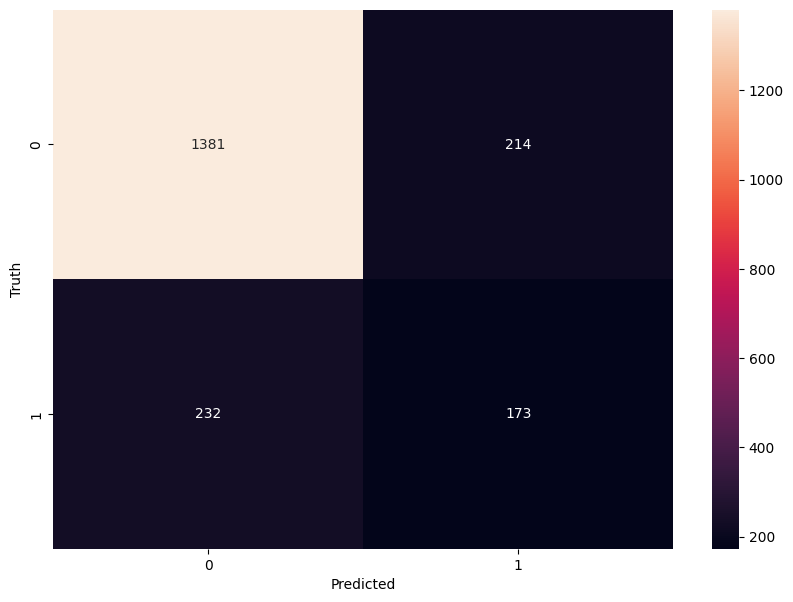

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')